In [13]:
# Occupancy Detection: 
# The DS is for binary classification for room occupancy, based on:
# Temperature, Humidity, Light, CO2

# Source of DS: 
# https://archive.ics.uci.edu/dataset/357/occupancy+detection

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.ensemble import IsolationForest

<h2><center>Loading and Exploring the data</center><h2>

In [15]:
# Loading the datasets
df1 = pd.read_csv('datatest.txt')
df2 = pd.read_csv('datatest2.txt')
df3 = pd.read_csv('datatraining.txt')

In [16]:
print('shape of df1:', df1.shape)
print('shape of df2:', df2.shape)
print('shape of df3:', df3.shape)
#  I am going to combine these three DS into one
df = pd.concat([df1, df2, df3], axis=0)
# Save the combined DS
df.to_csv('Combined_DS.csv', index=False)

shape of df1: (2665, 7)
shape of df2: (9752, 7)
shape of df3: (8143, 7)


In [17]:
df.shape

(20560, 7)

In [18]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [19]:
# Let's look at data column, when the DS is started to recorded 
print(f"Start date: {df['date'].min()}")
print(f"End date: {df['date'].max()}")
# The data is recorded in 15 days
# The data is recorded in 1 minute.

# Converting the timestamp to datetime
df['date'] = pd.to_datetime(df['date'])
# Extracting time 
df['Hour'] = df['date'].dt.hour
df['Minute'] = df['date'].dt.minute
df['Day'] = df['date'].dt.day
df = df.drop('date', axis=1)

Start date: 2015-02-02 14:19:00
End date: 2015-02-18 09:19:00


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20560 entries, 140 to 8143
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    20560 non-null  float64
 1   Humidity       20560 non-null  float64
 2   Light          20560 non-null  float64
 3   CO2            20560 non-null  float64
 4   HumidityRatio  20560 non-null  float64
 5   Occupancy      20560 non-null  int64  
 6   Hour           20560 non-null  int32  
 7   Minute         20560 non-null  int32  
 8   Day            20560 non-null  int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 1.3 MB


In [21]:
print(df['Occupancy'].value_counts())
print(df.describe()) 
# The ds is imbalanced, the minority class is occupied (1)
# Light and CO2 are skewed and have big outliers

Occupancy
0    15810
1     4750
Name: count, dtype: int64
        Temperature      Humidity         Light           CO2  HumidityRatio  \
count  20560.000000  20560.000000  20560.000000  20560.000000   20560.000000   
mean      20.906212     27.655925    130.756622    690.553276       0.004228   
std        1.055315      4.982154    210.430875    311.201281       0.000768   
min       19.000000     16.745000      0.000000    412.750000       0.002674   
25%       20.200000     24.500000      0.000000    460.000000       0.003719   
50%       20.700000     27.290000      0.000000    565.416667       0.004292   
75%       21.525000     31.290000    301.000000    804.666667       0.004832   
max       24.408333     39.500000   1697.250000   2076.500000       0.006476   

          Occupancy          Hour        Minute           Day  
count  20560.000000  20560.000000  20560.000000  20560.000000  
mean       0.231031     11.446887     29.504621     10.073249  
std        0.421503      7.07

In [22]:
# Some columns have many decimal places, let's round them.
df = df.round({'Temperature': 2, 'Humidity': 2, 'Light': 2, 'CO2': 2, 'HumidityRatio': 5})
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Hour,Minute,Day
140,23.70,26.27,585.20,749.20,0.00476,1,14,19,2
141,23.72,26.29,578.40,760.40,0.00477,1,14,19,2
142,23.73,26.23,572.67,769.67,0.00477,1,14,21,2
143,23.72,26.12,493.75,774.75,0.00474,1,14,22,2
144,23.75,26.20,488.60,779.00,0.00477,1,14,23,2


In [23]:
# Checking for duplicates
df.duplicated().sum()
# I have 54 duplicate rows, I will remove them


54

In [24]:
df = df.drop_duplicates()

In [25]:
# the miss and nan values
df.isnull().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
Hour             0
Minute           0
Day              0
dtype: int64

In [27]:
df.isna().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
Hour             0
Minute           0
Day              0
dtype: int64

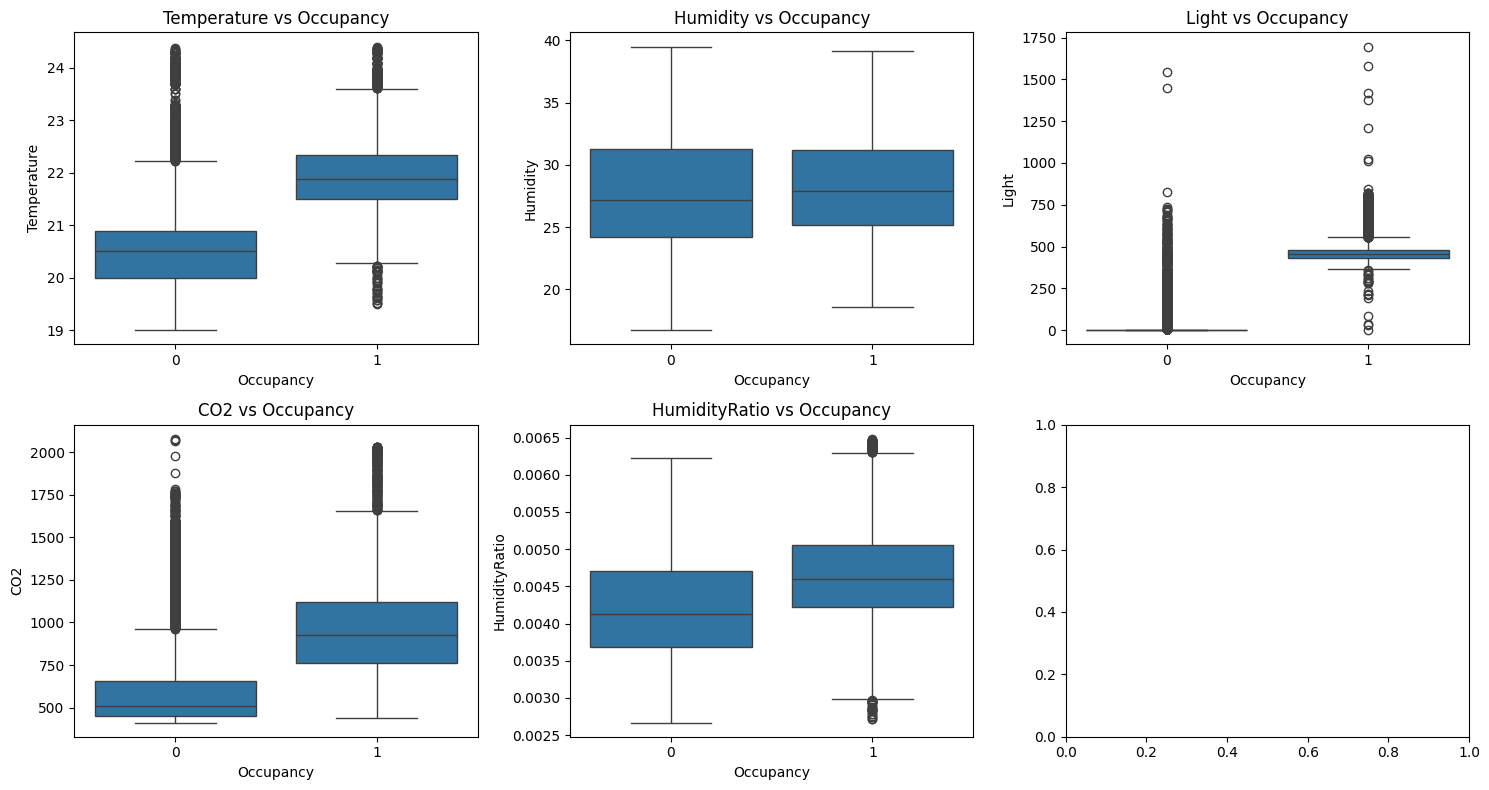

In [28]:
# Let's visualize the data
fig, axes = plt.subplots(2, 3, figsize=(15,8))
for ax, col in zip(axes.ravel(), ['Temperature','Humidity','Light','CO2','HumidityRatio']):
    sns.boxplot(data=df, x='Occupancy', y=col, ax=ax)
    ax.set_title(f'{col} vs Occupancy')
plt.tight_layout()
plt.show()

# Source of code structure:
# https://stackoverflow.com/questions/41325160/seaborn-plots-in-a-loop

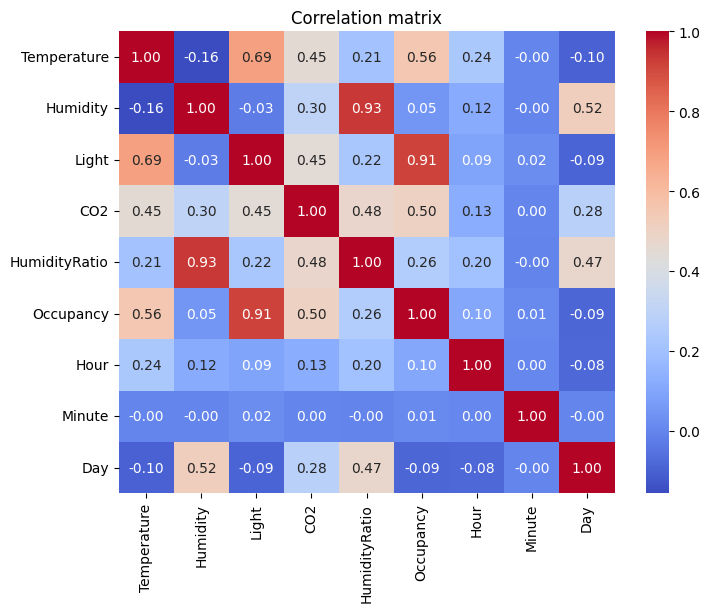

In [28]:
# correlation matrix
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()
# Light has very strong correlation with occupancy, which makes sense when people are in the room, the light is on.
# CO2 also has correlation with occupancy.
# Light has related with temperature and CO2.

In [ ]:
# Some columns have outliers, so If I drop them, it might be problematic for time series 
# because, that makes gaps in the data.
# I will use RobustScaler later.

In [29]:
# I am going to drop the light column.
df = df.drop(['Light'], axis=1)

In [30]:
# Save the cleaned DS
df.to_csv('Cleaned_DS.csv', index=False)